# Compare JS divergence distribution

In [19]:
from utils import *
import re
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

TEXT_COL = "entities"

In [20]:
datasets = load_dataset()  # load dataset
features = load_pred_features()  # load features
print(f'datasets: {datasets.keys()}')
print(f'features: {len(features)}')

datasets: dict_keys(['train', 'test', 'prsp', 'external'])
features: 1931


In [21]:
"""
Vectorizers: raw count OR normalized freq OR TFIDF
"""

# parameter (keep the same as latest pipeline)
count_params = {'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': np.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.9,
 'max_features': None,
 'min_df': 10,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': ['a',
  'about',
  'above',
  'across',
  'after',
  'afterwards',
  'again',
  'against',
  'ain',
  'all',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'am',
  'among',
  'amongst',
  'amoungst',
  'amount',
  'an',
  'and',
  'another',
  'any',
  'anyhow',
  'anyone',
  'anything',
  'anyway',
  'anywhere',
  'are',
  'aren',
  'around',
  'as',
  'at',
  'back',
  'be',
  'became',
  'because',
  'become',
  'becomes',
  'becoming',
  'been',
  'before',
  'beforehand',
  'behind',
  'being',
  'below',
  'beside',
  'besides',
  'between',
  'beyond',
  'bill',
  'both',
  'bottom',
  'but',
  'by',
  'call',
  'can',
  'cannot',
  'cant',
  'co',
  'con',
  'could',
  'couldn',
  'couldnt',
  'cry',
  'd',
  'de',
  'describe',
  'detail',
  'did',
  'didn',
  'do',
  'does',
  'doesn',
  'doing',
  'don',
  'done',
  'down',
  'due',
  'during',
  'each',
  'eg',
  'eight',
  'either',
  'eleven',
  'else',
  'elsewhere',
  'empty',
  'enough',
  'etc',
  'even',
  'ever',
  'every',
  'everyone',
  'everything',
  'everywhere',
  'except',
  'few',
  'fifteen',
  'fify',
  'fill',
  'find',
  'fire',
  'first',
  'five',
  'for',
  'former',
  'formerly',
  'forty',
  'found',
  'four',
  'from',
  'front',
  'full',
  'further',
  'get',
  'give',
  'go',
  'had',
  'hadn',
  'has',
  'hasn',
  'hasnt',
  'have',
  'haven',
  'having',
  'he',
  'hence',
  'her',
  'here',
  'hereafter',
  'hereby',
  'herein',
  'hereupon',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'however',
  'hundred',
  'i',
  'ie',
  'if',
  'in',
  'inc',
  'indeed',
  'interest',
  'into',
  'is',
  'isn',
  'it',
  'its',
  'itself',
  'just',
  'keep',
  'last',
  'latter',
  'latterly',
  'least',
  'less',
  'll',
  'ltd',
  'm',
  'ma',
  'made',
  'many',
  'may',
  'me',
  'meanwhile',
  'might',
  'mightn',
  'mill',
  'mine',
  'more',
  'moreover',
  'most',
  'mostly',
  'move',
  'much',
  'must',
  'mustn',
  'my',
  'myself',
  'name',
  'namely',
  'needn',
  'neither',
  'never',
  'nevertheless',
  'next',
  'nine',
  'no',
  'nobody',
  'none',
  'noone',
  'nor',
  'not',
  'nothing',
  'now',
  'nowhere',
  'o',
  'of',
  'off',
  'often',
  'on',
  'once',
  'one',
  'only',
  'onto',
  'or',
  'other',
  'others',
  'otherwise',
  'our',
  'ours',
  'ourselves',
  'out',
  'over',
  'own',
  'part',
  'per',
  'perhaps',
  'please',
  'put',
  'rather',
  're',
  's',
  'same',
  'see',
  'seem',
  'seemed',
  'seeming',
  'seems',
  'serious',
  'several',
  'shan',
  'she',
  'should',
  'shouldn',
  'show',
  'side',
  'since',
  'sincere',
  'six',
  'sixty',
  'so',
  'some',
  'somehow',
  'someone',
  'something',
  'sometime',
  'sometimes',
  'somewhere',
  'still',
  'such',
  'system',
  't',
  'take',
  'ten',
  'than',
  'that',
  'the',
  'their',
  'theirs',
  'them',
  'themselves',
  'then',
  'thence',
  'there',
  'thereafter',
  'thereby',
  'therefore',
  'therein',
  'thereupon',
  'these',
  'they',
  'thick',
  'thin',
  'third',
  'this',
  'those',
  'though',
  'three',
  'through',
  'throughout',
  'thru',
  'thus',
  'to',
  'together',
  'too',
  'top',
  'toward',
  'towards',
  'twelve',
  'twenty',
  'two',
  'un',
  'under',
  'until',
  'up',
  'upon',
  'us',
  've',
  'very',
  'via',
  'was',
  'wasn',
  'we',
  'well',
  'were',
  'weren',
  'what',
  'whatever',
  'when',
  'whence',
  'whenever',
  'where',
  'whereafter',
  'whereas',
  'whereby',
  'wherein',
  'whereupon',
  'wherever',
  'whether',
  'which',
  'while',
  'whither',
  'who',
  'whoever',
  'whole',
  'whom',
  'whose',
  'why',
  'will',
  'with',
  'within',
  'without',
  'won',
  'would',
  'wouldn',
  'y',
  'yet',
  'you',
  'your',
  'yours',
  'yourself',
  'yourselves'],
 'strip_accents': None,
 'token_pattern': '\\S+',
 'tokenizer': None,
 'vocabulary': None}

tfidf_params = {'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': np.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.9,
 'max_features': None,
 'min_df': 10,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': ['a',
  'about',
  'above',
  'across',
  'after',
  'afterwards',
  'again',
  'against',
  'ain',
  'all',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'am',
  'among',
  'amongst',
  'amoungst',
  'amount',
  'an',
  'and',
  'another',
  'any',
  'anyhow',
  'anyone',
  'anything',
  'anyway',
  'anywhere',
  'are',
  'aren',
  'around',
  'as',
  'at',
  'back',
  'be',
  'became',
  'because',
  'become',
  'becomes',
  'becoming',
  'been',
  'before',
  'beforehand',
  'behind',
  'being',
  'below',
  'beside',
  'besides',
  'between',
  'beyond',
  'bill',
  'both',
  'bottom',
  'but',
  'by',
  'call',
  'can',
  'cannot',
  'cant',
  'co',
  'con',
  'could',
  'couldn',
  'couldnt',
  'cry',
  'd',
  'de',
  'describe',
  'detail',
  'did',
  'didn',
  'do',
  'does',
  'doesn',
  'doing',
  'don',
  'done',
  'down',
  'due',
  'during',
  'each',
  'eg',
  'eight',
  'either',
  'eleven',
  'else',
  'elsewhere',
  'empty',
  'enough',
  'etc',
  'even',
  'ever',
  'every',
  'everyone',
  'everything',
  'everywhere',
  'except',
  'few',
  'fifteen',
  'fify',
  'fill',
  'find',
  'fire',
  'first',
  'five',
  'for',
  'former',
  'formerly',
  'forty',
  'found',
  'four',
  'from',
  'front',
  'full',
  'further',
  'get',
  'give',
  'go',
  'had',
  'hadn',
  'has',
  'hasn',
  'hasnt',
  'have',
  'haven',
  'having',
  'he',
  'hence',
  'her',
  'here',
  'hereafter',
  'hereby',
  'herein',
  'hereupon',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'however',
  'hundred',
  'i',
  'ie',
  'if',
  'in',
  'inc',
  'indeed',
  'interest',
  'into',
  'is',
  'isn',
  'it',
  'its',
  'itself',
  'just',
  'keep',
  'last',
  'latter',
  'latterly',
  'least',
  'less',
  'll',
  'ltd',
  'm',
  'ma',
  'made',
  'many',
  'may',
  'me',
  'meanwhile',
  'might',
  'mightn',
  'mill',
  'mine',
  'more',
  'moreover',
  'most',
  'mostly',
  'move',
  'much',
  'must',
  'mustn',
  'my',
  'myself',
  'name',
  'namely',
  'needn',
  'neither',
  'never',
  'nevertheless',
  'next',
  'nine',
  'no',
  'nobody',
  'none',
  'noone',
  'nor',
  'not',
  'nothing',
  'now',
  'nowhere',
  'o',
  'of',
  'off',
  'often',
  'on',
  'once',
  'one',
  'only',
  'onto',
  'or',
  'other',
  'others',
  'otherwise',
  'our',
  'ours',
  'ourselves',
  'out',
  'over',
  'own',
  'part',
  'per',
  'perhaps',
  'please',
  'put',
  'rather',
  're',
  's',
  'same',
  'see',
  'seem',
  'seemed',
  'seeming',
  'seems',
  'serious',
  'several',
  'shan',
  'she',
  'should',
  'shouldn',
  'show',
  'side',
  'since',
  'sincere',
  'six',
  'sixty',
  'so',
  'some',
  'somehow',
  'someone',
  'something',
  'sometime',
  'sometimes',
  'somewhere',
  'still',
  'such',
  'system',
  't',
  'take',
  'ten',
  'than',
  'that',
  'the',
  'their',
  'theirs',
  'them',
  'themselves',
  'then',
  'thence',
  'there',
  'thereafter',
  'thereby',
  'therefore',
  'therein',
  'thereupon',
  'these',
  'they',
  'thick',
  'thin',
  'third',
  'this',
  'those',
  'though',
  'three',
  'through',
  'throughout',
  'thru',
  'thus',
  'to',
  'together',
  'too',
  'top',
  'toward',
  'towards',
  'twelve',
  'twenty',
  'two',
  'un',
  'under',
  'until',
  'up',
  'upon',
  'us',
  've',
  'very',
  'via',
  'was',
  'wasn',
  'we',
  'well',
  'were',
  'weren',
  'what',
  'whatever',
  'when',
  'whence',
  'whenever',
  'where',
  'whereafter',
  'whereas',
  'whereby',
  'wherein',
  'whereupon',
  'wherever',
  'whether',
  'which',
  'while',
  'whither',
  'who',
  'whoever',
  'whole',
  'whom',
  'whose',
  'why',
  'will',
  'with',
  'within',
  'without',
  'won',
  'would',
  'wouldn',
  'y',
  'yet',
  'you',
  'your',
  'yours',
  'yourself',
  'yourselves'],
 'strip_accents': None,
 'sublinear_tf': True,
 'token_pattern': '\\S+',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

count_vec = CountVectorizer(**count_params)
tfidf_vec = TfidfVectorizer(**tfidf_params)

# Fit on train text
train_text = datasets["train"][TEXT_COL].astype(str).tolist()
X_count = {}
X_tfidf = {}

X_count["train"] = count_vec.fit_transform(train_text)
X_tfidf["train"] = tfidf_vec.fit_transform(train_text)

# Transform other datasets
for name in datasets.keys():
    if name == "train":
        continue
    text = datasets[name][TEXT_COL].astype(str).tolist()
    X_count[name] = count_vec.transform(text)
    X_tfidf[name] = tfidf_vec.transform(text)

count_features = np.array(count_vec.get_feature_names_out())
tfidf_features = np.array(tfidf_vec.get_feature_names_out())

print("Count vocab:", len(count_features))
print("TFIDF vocab:", len(tfidf_features))
same_vocab = np.array_equal(count_features, tfidf_features)
print("Count and TF-IDF vocab identical (same tokens, same order):", same_vocab)

Count vocab: 99455
TFIDF vocab: 99455
Count and TF-IDF vocab identical (same tokens, same order): True


In [22]:
"""
Only keep selected features
"""
# choose vocab
VOCAB = count_features  # or tfidf_features (identical)

vocab_index = {t:i for i, t in enumerate(VOCAB)}

selected_in_vocab = [t for t in features if t in vocab_index]
missing = [t for t in features if t not in vocab_index]

sel_idx = np.array([vocab_index[t] for t in selected_in_vocab], dtype=int)

print("Selected total:", len(features))
print("In vocab:", len(selected_in_vocab))
print("Missing:", len(missing))
print("Example missing:", missing[:20])

Selected total: 1931
In vocab: 1931
Missing: 0
Example missing: []


In [24]:
"""
Build probability distribution p(feature | dataset, quarter)
Raw count:  p = (sum counts per feature + alpha) / total
Freq: row-normalize counts (each note sums to 1), then sum across notes, then normalize
tfidf: p = (sum tfidf mass per feature + alpha) / total

"""

def get_quarter_mask(df, quarter_value):
    return df["quarter"].values == quarter_value

def to_prob(vec, alpha=1e-12):
    vec = np.asarray(vec).ravel()
    vec = vec + alpha
    vec = vec / vec.sum()
    return vec

def quarterly_dist_count(df, Xc, q, alpha=1e-12):
    mask = get_quarter_mask(df, q)
    Xq = Xc[mask]
    s = np.asarray(Xq.sum(axis=0)).ravel() # total count of feature i across all notes in this quarter
    return to_prob(s, alpha=alpha)

def quarterly_dist_freq(df, Xc, q, alpha=1e-12):
    # length-normalized per note
    mask = get_quarter_mask(df, q)
    Xq = Xc[mask]
    if Xq.shape[0] == 0:
        return None
    Xq_norm = normalize(Xq, norm="l1", axis=1)  # each row sums to 1
    s = np.asarray(Xq_norm.sum(axis=0)).ravel()
    return to_prob(s, alpha=alpha)

def quarterly_dist_tfidf(df, Xt, q, alpha=1e-12):
    mask = get_quarter_mask(df, q)
    Xq = Xt[mask]
    s = np.asarray(Xq.sum(axis=0)).ravel()  # total tf-idf weight for feature i in the quarter
    return to_prob(s, alpha=alpha)

def global_dist_count(Xc, alpha=1e-12):
    s = np.asarray(Xc.sum(axis=0)).ravel()
    return to_prob(s, alpha=alpha)

def global_dist_freq(Xc, alpha=1e-12):
    Xn = normalize(Xc, norm="l1", axis=1)
    s = np.asarray(Xn.sum(axis=0)).ravel()
    return to_prob(s, alpha=alpha)

def global_dist_tfidf(Xt, alpha=1e-12):
    s = np.asarray(Xt.sum(axis=0)).ravel()
    return to_prob(s, alpha=alpha)


def build_all_quarterly_dists(datasets, X_count, X_tfidf, quarters, alpha=1e-12):
    dataset_names = datasets.keys()
    P_count = {name: {} for name in dataset_names}
    P_freq  = {name: {} for name in dataset_names}
    P_tfidf = {name: {} for name in dataset_names}

    for name in dataset_names:
        df = datasets[name]
        for q in quarters:
            if not (df["quarter"] == q).any():
                continue
            P_count[name][q] = quarterly_dist_count(df, X_count[name], q, alpha=alpha)
            P_freq[name][q]  = quarterly_dist_freq(df,  X_count[name], q, alpha=alpha)
            P_tfidf[name][q] = quarterly_dist_tfidf(df, X_tfidf[name], q, alpha=alpha)
    return P_count, P_freq, P_tfidf

# probability vec over the full vocab
all_quarters = sorted(set().union(*[set(df["quarter"].unique()) for df in datasets.values()]))
P_count, P_freq, P_tfidf = build_all_quarterly_dists(datasets, X_count, X_tfidf, all_quarters, alpha=1e-12)
P_train_all_count = global_dist_count(X_count["train"], alpha=1e-12)
P_train_all_freq  = global_dist_freq(X_count["train"],  alpha=1e-12)
P_train_all_tfidf = global_dist_tfidf(X_tfidf["train"], alpha=1e-12)

In [25]:
"""
Compute JS divergence
Scipy's jensenshannon returns JS *distance* (sqrt(JS divergence))
Comparison: (whole dev - quarterly test/prosp/external set)
"""

def restrict_and_renorm(p_full, sel_idx, eps=1e-30):
    p = p_full[sel_idx].astype(float)
    s = p.sum()
    return p / (s + eps)


def compute_js_trainall_vs_others(P, P_train_all, quarters, train_name, others, sel_idx):
    rows = []

    # fixed reference: train(all), restricted to selected features
    pa = restrict_and_renorm(P_train_all, sel_idx)

    for other in others:
        if other == train_name:
            continue

        for q in quarters:
            if q not in P.get(other, {}):
                continue

            pb = restrict_and_renorm(P[other][q], sel_idx)

            js_dist = jensenshannon(pa, pb, base=2.0)
            rows.append({
                "quarter": q,
                "pair": f"{train_name}(all) vs {other}",
                "js_distance": float(js_dist),
                "js_divergence": float(js_dist**2),
                "n_selected": int(len(sel_idx)),
            })

    return pd.DataFrame(rows)


train_name = "train"
others = [k for k in datasets.keys() if k != "train"]

js_count = compute_js_trainall_vs_others(P_count, P_train_all_count, all_quarters, train_name, others, sel_idx)
js_freq  = compute_js_trainall_vs_others(P_freq, P_train_all_count, all_quarters, train_name, others, sel_idx)
js_tfidf = compute_js_trainall_vs_others(P_tfidf, P_train_all_count, all_quarters, train_name, others, sel_idx)

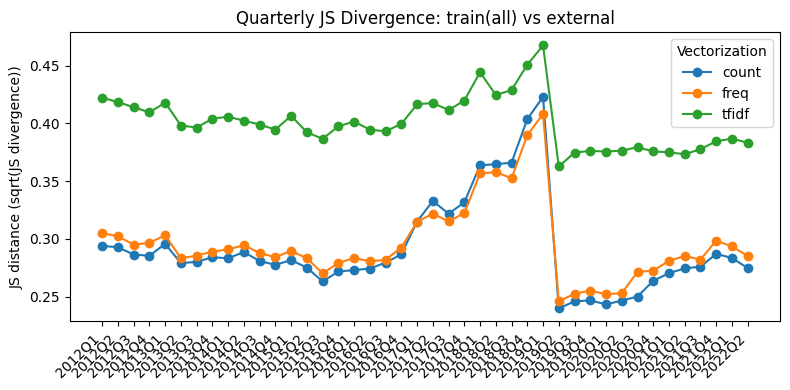

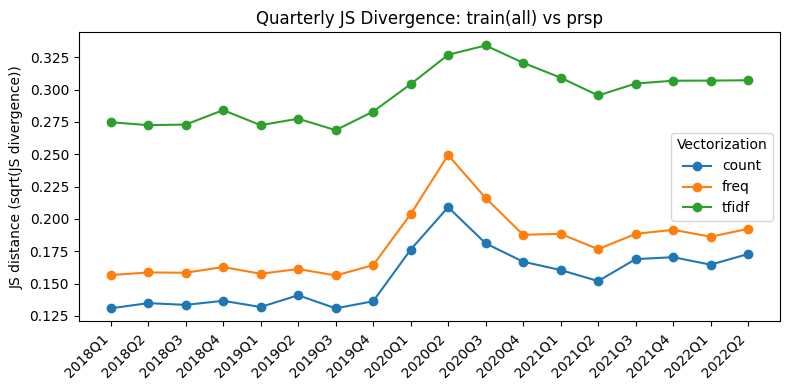

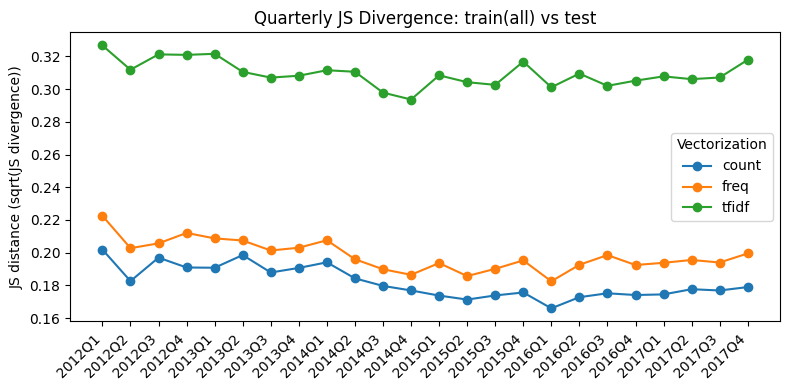

In [28]:
js_count["vectorizer"] = "count"
js_freq["vectorizer"]  = "freq"
js_tfidf["vectorizer"] = "tfidf"

js_all = pd.concat([js_count, js_freq, js_tfidf], ignore_index=True)

def plot_js(df, title_prefix="JS Divergence"):
    for pair, sub in df.groupby("pair"):
        plt.figure(figsize=(8, 4))

        for vec_name, sub_vec in sub.groupby("vectorizer"):
            sub_vec = sub_vec.sort_values("quarter")
            x = sub_vec["quarter"].astype(str)
            y = sub_vec["js_distance"]
            plt.plot(x, y, marker="o", label=vec_name)

        plt.xticks(rotation=45, ha="right")
        plt.ylabel("JS distance (sqrt(JS divergence))")
        plt.title(f"{title_prefix}: {pair}")
        plt.legend(title="Vectorization")
        plt.tight_layout()
        plt.show()

plot_js(js_all, title_prefix="Quarterly JS Divergence")

In [45]:
"""
Find features with most difference in JS divergence
Comparison: whole train set vs. quarterly test/prosp/external sets
"""

def js_feature_contrib_selected(p_full, q_full, sel_idx, eps=1e-30):
    """
    Per-feature contribution to JS divergence computed ONLY on selected features.
    contrib.sum() ~= JS divergence on selected features.
    """
    p = restrict_and_renorm(p_full, sel_idx, eps=eps)
    q = restrict_and_renorm(q_full, sel_idx, eps=eps)

    # clip to avoid log(0)
    p = np.clip(p, eps, None)
    q = np.clip(q, eps, None)

    # renorm on selected features
    p = p / p.sum()
    q = q / q.sum()

    m = 0.5 * (p + q)  # mixture dist
    contrib = 0.5 * (p * np.log2(p / m) + q * np.log2(q / m))
    return contrib, p, q  # p,q are now selected+renormed

def top_js_features_trainall_vs_quarter(P, train_all_full, other_name, quarter,feature_names, sel_idx, top_k=20, eps=1e-12,):
    # quarter must exist in the other set
    if quarter not in P.get(other_name, {}):
        return None
 
    p_full = train_all_full          # fixed reference
    q_full = P[other_name][quarter]  # quarterly target

    contrib, p_sel, q_sel = js_feature_contrib_selected(p_full, q_full, sel_idx, eps=eps)

    idx_local = np.argsort(contrib)[-top_k:][::-1]
    feat_sel = np.asarray(feature_names)[sel_idx]

    total_js = contrib.sum()
    out = pd.DataFrame({
        "quarter": [quarter] * len(idx_local),
        "quarter_str": [quarter.strftime("%YQ%q")] * len(idx_local),
        "pair": [f"train(all) vs {other_name}"] * len(idx_local),
        "feature": feat_sel[idx_local],
        "js_contrib": contrib[idx_local],
        "js_pct": contrib[idx_local] / (total_js + eps),
        "js_total": total_js,
        "js_dist_total": np.sqrt(total_js),
        "p_train_all": p_sel[idx_local],
        f"p_{other_name}": q_sel[idx_local],
        f"diff_(trainall-{other_name})": (p_sel[idx_local] - q_sel[idx_local]),
        "n_selected": len(sel_idx),
    })
    return out

def top_js_contrib_over_time(P, train_all_full, others, quarters, feature_names, sel_idx, top_k=10, eps=1e-12):
    rows = []
    for other in others:
        for q in quarters:
            out = top_js_features_trainall_vs_quarter(
                P,train_all_full,
                other, q,
                feature_names, sel_idx,
                top_k=top_k, eps=eps
            )
            if out is not None and len(out) > 0:
                rows.append(out)

    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

In [46]:
train_name = "train"
others = [k for k in datasets.keys() if k != train_name]
all_quarters = sorted(set().union(*[set(df["quarter"].unique()) for df in datasets.values()]))

# freq
df_top_freq = top_js_contrib_over_time(
    P_freq, P_train_all_freq,
    others, all_quarters,
    count_features, sel_idx,
    top_k=20
)

# count
df_top_count = top_js_contrib_over_time(
    P_count, P_train_all_freq,
    others, all_quarters,
    count_features, sel_idx,
    top_k=20
)

# tf-idf
df_top_tfidf = top_js_contrib_over_time(
    P_tfidf,P_train_all_freq,
    others, all_quarters,
    tfidf_features, sel_idx,
    top_k=20,
)

In [47]:
df_top_count

,quarter,quarter_str,pair,feature,js_contrib,js_pct,js_total,js_dist_total,p_train_all,p_test,diff_(trainall-test),n_selected,p_prsp,diff_(trainall-prsp),p_external,diff_(trainall-external)
0,2012Q1,2012Q1,train(all) vs test,section351,0.001210,0.027364,0.044217,0.210279,0.002420,1.000000e-12,0.002420,1931,NaN,NaN,NaN,NaN
1,2012Q1,2012Q1,train(all) vs test,pain,0.000412,0.009321,0.044217,0.210279,0.153079,1.723581e-01,-0.019279,1931,NaN,NaN,NaN,NaN
2,2012Q1,2012Q1,train(all) vs test,called av,0.000343,0.007759,0.044217,0.210279,0.001103,1.077238e-04,0.000995,1931,NaN,NaN,NaN,NaN
3,2012Q1,2012Q1,train(all) vs test,panadeine forte,0.000342,0.007744,0.044217,0.210279,0.001349,3.447161e-03,-0.002098,1931,NaN,NaN,NaN,NaN
4,2012Q1,2012Q1,train(all) vs test,chest pain,0.000337,0.007630,0.044217,0.210279,0.014102,1.971345e-02,-0.005611,1931,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2022Q2,2022Q2,train(all) vs external,ibuprofen,0.001029,0.012195,0.084369,0.290463,0.000945,NaN,NaN,1931,NaN,NaN,0.004823,-0.003879
1676,2022Q2,2022Q2,train(all) vs external,schizophrenia,0.001004,0.011906,0.084369,0.290463,0.003909,NaN,NaN,1931,NaN,NaN,0.000574,0.003335
1677,2022Q2,2022Q2,train(all) vs external,acs,0.000906,0.010734,0.084369,0.290463,0.002077,NaN,NaN,1931,NaN,NaN,0.000044,0.002032
1678,2022Q2,2022Q2,train(all) vs external,lac,0.000887,0.010509,0.084369,0.290463,0.011760,NaN,NaN,1931,NaN,NaN,0.005353,0.006407


In [50]:
df_top_count.value_counts("feature")

feature
o/a gcs               72
intubate              72
direct                68
taken                 61
direct resus          55
                      ..
anxiety depression     1
substance              1
pt took                1
ivdu                   1
ibuprofen              1
Name: count, Length: 177, dtype: int64

In [51]:
df_top_tfidf.value_counts("feature")

feature
pain                 84
nil                  83
right                67
gcs                  65
direct               57
                     ..
contact phx           1
taken hours           1
x panadol             1
x paracetamol         1
paracetamol hours     1
Name: count, Length: 259, dtype: int64

In [52]:
df_top_freq.value_counts("feature")

feature
o/a gcs           73
direct            70
taken             62
nil               55
states            54
                  ..
self presented     1
swelling           1
pt took            1
hours x            1
ivdu               1
Name: count, Length: 254, dtype: int64